# Assignment BioSB course
#### Modelling chronic lymphocytic leukemia cell kinetics
Petrus Bult - Eindhoven University of Technology

In [12]:
# Load the module created for this assignment & other required modules
using Pkg
Pkg.activate("..")
Pkg.instantiate()

using SimODEs_BioSB
using Plots

  Activating project at `c:\Repos\dynamic-modeling-in-systems-biology`
Precompiling project...
  27060.1 ms  ✓ SimODEs_BioSB
  1 dependency successfully precompiled in 189 seconds. 377 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version. Otherwise, loading dependents of this package may trigger further precompilation to work with the unexpected version.


#### Load and plot the provided .csv data

In [5]:
# Load_cll_data returns an 'observed_data' struct, that contains time points and measurements (and optionally weights - inverse stds - of the measurements)
dataset1 = load_cll_data("data/dataset1.csv")
dataset2 = load_cll_data("data/dataset2.csv")

Dict{String, ObservedData} with 2 entries:
  "tissue" => ObservedData([0.0, 45.0, 90.0], [3.0525e12, 7.0412e11, 2.1437e11]…
  "blood"  => ObservedData([0.0, 15.0, 30.0, 45.0, 60.0, 75.0, 90.0, 105.0, 120…

#### Plot data from both datasets

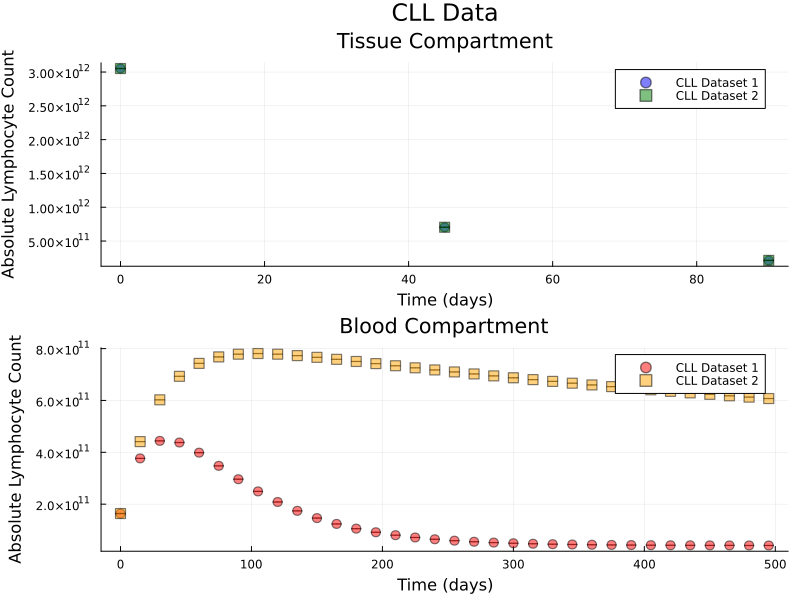

In [57]:
plot_cll(observed=[dataset1, dataset2], data_labels=["CLL Dataset 1", "CLL Dataset 2"], alpha=0.5)

In [59]:
# Starting values from the data
tissue_0 = dataset1["tissue"].values[1]
blood_0 = dataset1["blood"].values[1]

# Lower and upper bounds of the parameters
lb = [5e-5, 1e-4, 1e-4, 1e5] # Lower bound parameters
lb_0 = [0.75*tissue_0, 0.75*blood_0] # Lower bound initial conditions
ub = [0.5, 0.1, 0.1, tissue_0] # Upper bound parameters
ub_0 = [1.25*tissue_0, 1.25*blood] # Upper bound initial conditions

slow_model =  WodartzModel((m=0.015, d1=0.1, d2=0.002, c=0.05), (tissue=tissue_0, blood=blood_0));
fast_model =  WodartzModel((m=0.015, d1=0.1, d2=0.02, c=0.05), (tissue=tissue_0, blood=blood_0));

sol_slow = simulate(slow_model, tspan = (0.0, 500.0));
sol_fast = simulate(fast_model, tspan = (0.0, 500.0));


#### Plot both the fast and the slow model
The fast and slow models are created with the d2 to 0.02 and 0.002 respectively. The other parameters have been chosen such that the output is at least on the same scale as the provided data. (ofcourse once we estimate the parameters, we have a better result of what the parameters should be - but I briefly tuned them manually for now).

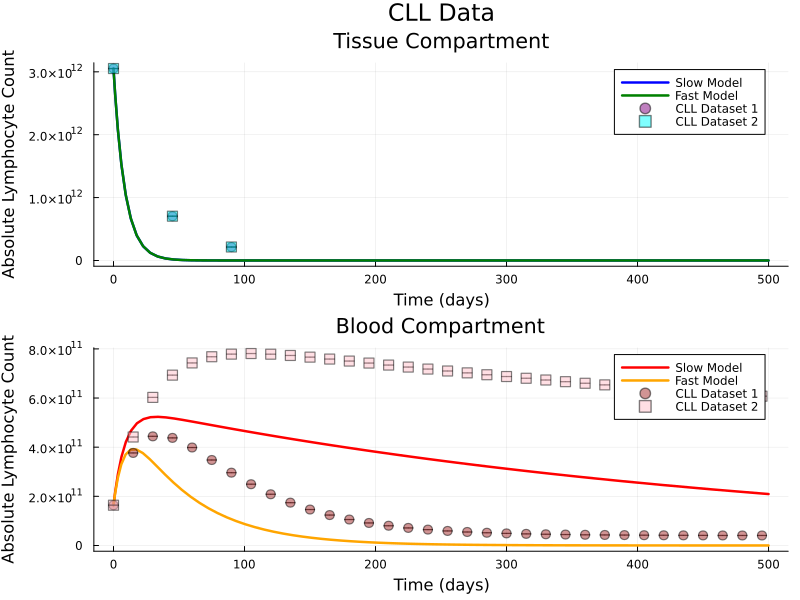

In [60]:
plot_cll(observed=[dataset1, dataset2], solutions=[sol_slow, sol_fast], data_labels=["CLL Dataset 1", "CLL Dataset 2"], solution_labels=["Slow Model", "Fast Model"], alpha=0.5)


### Derivation steady state values

The ODE system is given by:

$$\frac{dx}{dt} = -mx - d_1(x - c)$$
$$\frac{dy}{dt} = mx - d_2 y$$

At steady state -> both derivatives to 0.

**For the tissue compartment ($x_{ss}$):**

$$\frac{dx}{dt} = 0 \implies -mx - d_1(x - c) = 0 \implies x_{ss} = \frac{d_1 c}{m + d_1}$$

**For the blood compartment ($y_{ss}$):**

$$\frac{dy}{dt} = 0 \implies mx - d_2 y = 0 \implies y_{ss} = \frac{m x_{ss}}{d_2}$$

Substituting $x_{ss}$:
$$y_{ss} = \frac{m}{d_2} \cdot \frac{d_1 c}{m + d_1}$$


### Stability

To check stability, look at Jacobian at the steady state.

**Jacobian Matrix:**

$$J = \begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix} = \begin{bmatrix} -(m + d_1) & 0 \\ m & -d_2 \end{bmatrix}$$

**Eigenvalues:**

The eigenvalues are then given by:
$$\lambda_1 = -(m + d_1)$$
$$\lambda_2 = -d_2$$

Both eigenvalues are **negative** (since $m$, $d_1$, and $d_2$ are all positive parameters). This means the steady state is **asymptotically stable**.

### Data Simulation 
(skipped)

### Parameter Inference
Assignment: implement & combine global search with local search.

**Alternatively : sample many starting points & optimize from best x.**

(I already had some functionality lying around for this - so I'll do this first). The ... does ...

#### Global + local search strategy